<a href="https://colab.research.google.com/github/michalzdyb1994/Analysis-of-the-market-value-of-football-players/blob/main/Analysis-of-the-market-value-of-football-players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of sports and non-sport factors on the market value of a football player**
Presented by: Michał Zdyb

Date: 11 June 2023










###**Objective of the presentation**

The aim is to conduct analysis of sports and non-sport factors that are crucial to the assessment of a football player, taking into account the market value.                                                               Then, to build a linear regression model of the factors that have an impact on a market value.

In [ ]:
#Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

###**Import data from the website https://footystats.org/**

https://footystats.org/ includes all football statistics for tremendous amounts of leagues. We can find there constantly updated data about teams, matches or players. 

In [ ]:
#Uploading player statistic datasets for 5 the best european leagues for current season
england = pd.read_csv('/content/drive/MyDrive/Player stats/england-premier-league-players-2022-to-2023-stats.csv', encoding= "utf8")
pd.set_option('display.max_columns', 140)
italy = pd.read_csv('/content/drive/MyDrive/Player stats/italy-serie-a-players-2022-to-2023-stats.csv', encoding= "utf8")
pd.set_option('display.max_columns', 140)
germany = pd.read_csv('/content/drive/MyDrive/Player stats/germany-bundesliga-players-2022-to-2023-stats.csv', encoding= "utf8")
pd.set_option('display.max_columns', 140)
france = pd.read_csv('/content/drive/MyDrive/Player stats/france-ligue-1-players-2022-to-2023-stats.csv', encoding= "utf8")
pd.set_option('display.max_columns', 140)
spain = pd.read_csv('/content/drive/MyDrive/Player stats/spain-la-liga-players-2022-to-2023-stats.csv', encoding= "utf8")
pd.set_option('display.max_columns', 140)

#Uploading player statistic datasets for 5 the best european leagues for season 2021/2022
england2021 = pd.read_csv('/content/drive/MyDrive/Player stats/england-premier-league-players-2021-to-2022-stats.csv', encoding = 'utf8')
spain2021 = pd.read_csv('/content/drive/MyDrive/Player stats/spain-la-liga-players-2021-to-2022-stats.csv', encoding = 'utf8')
italy2021 = pd.read_csv('/content/drive/MyDrive/Player stats/italy-serie-a-players-2021-to-2022-stats.csv', encoding = 'utf8')
france2021 = pd.read_csv('/content/drive/MyDrive/Player stats/france-ligue-1-players-2021-to-2022-stats.csv', encoding = 'utf8')
germany2021 = pd.read_csv('/content/drive/MyDrive/Player stats/germany-bundesliga-players-2021-to-2022-stats.csv', encoding = 'utf8')

#Uploading player market values for years 2022 and 2023
values = pd.read_csv('/content/drive/MyDrive/Player stats/Values.csv', delimiter=';', encoding ='utf8')

#Uploading ranking for the best players - Balon d'or award
balon = pd.read_csv('/content/drive/MyDrive/Player stats/Balon dor.csv', delimiter=';', encoding ='utf8')

In [ ]:
#Concatenating all 5 leagues for current season
all5leagues = [spain, england, france, italy, germany]
result = pd.concat(all5leagues)

In [ ]:
#Concatenating all 5 leagues for season 2021/2022
all5leagues2021 = [spain2021, england2021, italy2021, france2021, germany2021]
result21 = pd.concat(all5leagues2021)

In [ ]:
#Concatenating all 5 leagues for season 2021/2022 & 2022/2023
all5leagues21_22 = [spain2021, england2021, italy2021, france2021, germany2021, spain, england, france, italy, germany]
result21_22 = pd.concat(all5leagues21_22)

In [ ]:
#Joining all 5 leagues with values 
inner_merge = pd.merge(values, result,  how='inner', on = ['full_name'])
inner_merge2 = pd.merge(values, result21_22, how = 'inner', on = ['full_name'])

###**Data Pre-Processing**

In [ ]:
result21_22.shape

(6660, 277)

In [ ]:
result21_22.isna().sum()

full_name                                         0
age                                               0
birthday                                          0
birthday_GMT                                      0
league                                            0
                                               ... 
booked_over05_percentage_overall               1165
booked_over05_percentage_percentile_overall    1165
shirt_number                                   1165
annual_salary_gbp                              3318
annual_salary_usd                              3318
Length: 277, dtype: int64

Some columns are null, probably due to insufficient data. However, the most important data is fully covered.

In [ ]:
result21_22.duplicated().any()

False

In [ ]:
#Shortening names for better visibility 
inner_merge['full_name'] = inner_merge['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Rafael Alexandre Conceição Leão'], 'Leão')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Pablo Martín Páez Gavira'], 'Gavi')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Rúben Santos Gato Alves Dias'], 'Ruben Dias')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Bruno Miguel Borges Fernandes'], 'Bruno Fernandes')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Gabriel Teodoro Martinelli Silva'], 'Gabriel Martinelli')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Antony Matheus dos Santos'], 'Antony')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Ronald Federico Araújo da Silva'], 'Ronald Araujo')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Lautaro Javier Martínez'], 'Lautaro Martinez')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Enzo Jeremías Fernández'], 'Enzo Fernandez')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Victor James Osimhen'], 'Victor Osimhen')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Pedro González López'], 'Pedri')
inner_merge['full_name'] = inner_merge['full_name'].replace([' Éder Gabriel Militão'], 'Éder Militão')
inner_merge['full_name'] = inner_merge['full_name'].replace(['Rodrygo Silva de Goes'], 'Rodri')

inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Rafael Alexandre Conceição Leão'], 'Leão')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Pablo Martín Páez Gavira'], 'Gavi')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Rúben Santos Gato Alves Dias'], 'Ruben Dias')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Bruno Miguel Borges Fernandes'], 'Bruno Fernandes')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Gabriel Teodoro Martinelli Silva'], 'Gabriel Martinelli')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Antony Matheus dos Santos'], 'Antony')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Ronald Federico Araújo da Silva'], 'Ronald Araujo')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Lautaro Javier Martínez'], 'Lautaro Martinez')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Enzo Jeremías Fernández'], 'Enzo Fernandez')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Victor James Osimhen'], 'Victor Osimhen')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Pedro González López'], 'Pedri')
inner_merge2['full_name'] = inner_merge2['full_name'].replace([' Éder Gabriel Militão'], 'Éder Militão')
inner_merge2['full_name'] = inner_merge2['full_name'].replace(['Rodrygo Silva de Goes'], 'Rodri')

###**Exploratory Data Analysis**

In the study I look at the 50 most valuable players based on a ranking from the https://www.transfermarkt.com/. On this account, I created separate dataset that contain 2 columns; name of a player and his market value. 

Text(0.5, 1.0, 'Top 50 most valuable players')

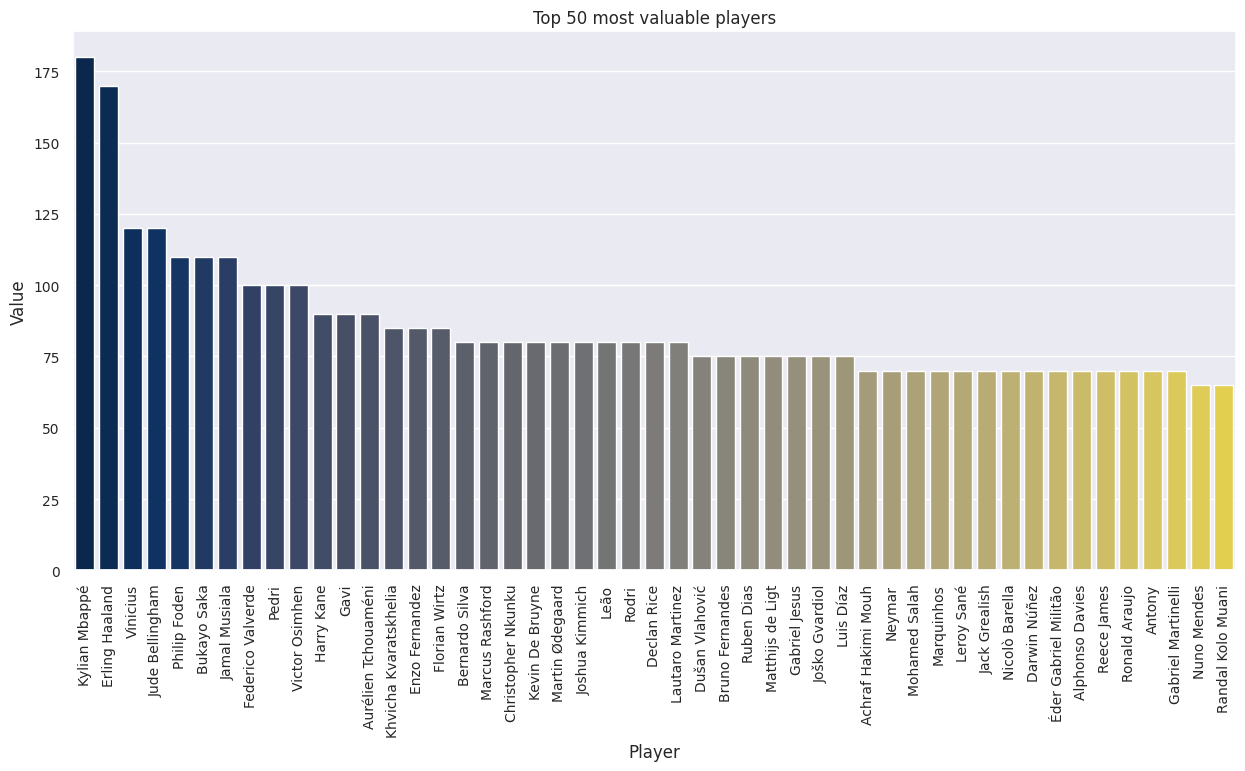

In [ ]:
value_of_top50 = inner_merge.sort_values(by = 'Value 2023', ascending = False)

sns.set(rc = {'figure.figsize': (15,7)})
plt.xticks(fontsize = 10, rotation = 'vertical' )
plt.yticks(fontsize = 10, rotation = 'horizontal')
s = sns.barplot(data = value_of_top50, x = 'full_name', y = 'Value 2023', palette = 'cividis')
s.set(xlabel='Player', ylabel = 'Value')
s.set_title('Top 50 most valuable players')

###Analysis 1 - Division of players by league

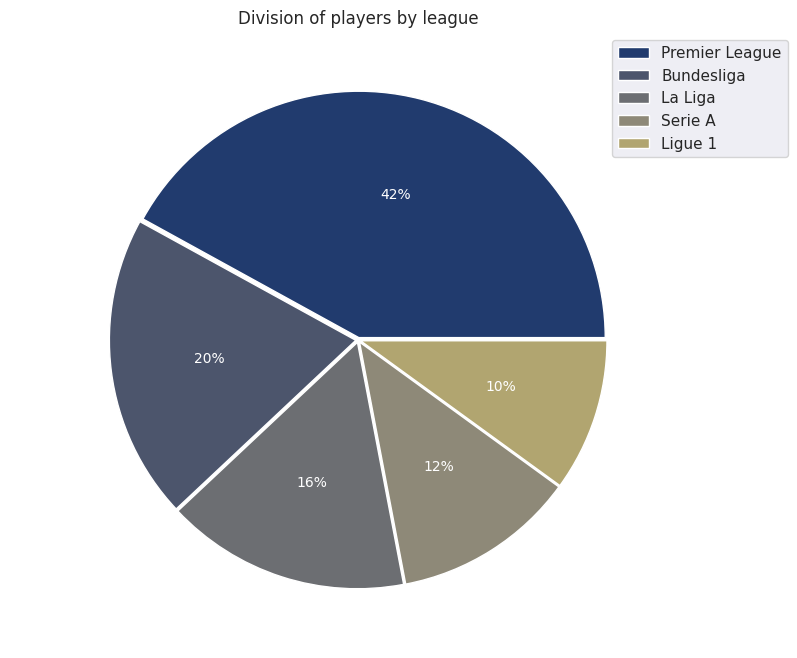

In [ ]:
leagueApp = inner_merge['league'].value_counts()

colors = sns.color_palette('cividis')
l = leagueApp.plot(kind = 'pie', figsize = (8,8), title = 'Division of players by league', 
                   fontsize = '10.0', ylabel = '', explode = [0.01, 0.01, 0.01, 0.01, 0.01], 
                   autopct = '%1.0f%%', colors = colors, textprops={'color':"w"})
l.legend(bbox_to_anchor = (0.9, 1), loc = 'upper left')

###Analysis 2 - Division of players by position

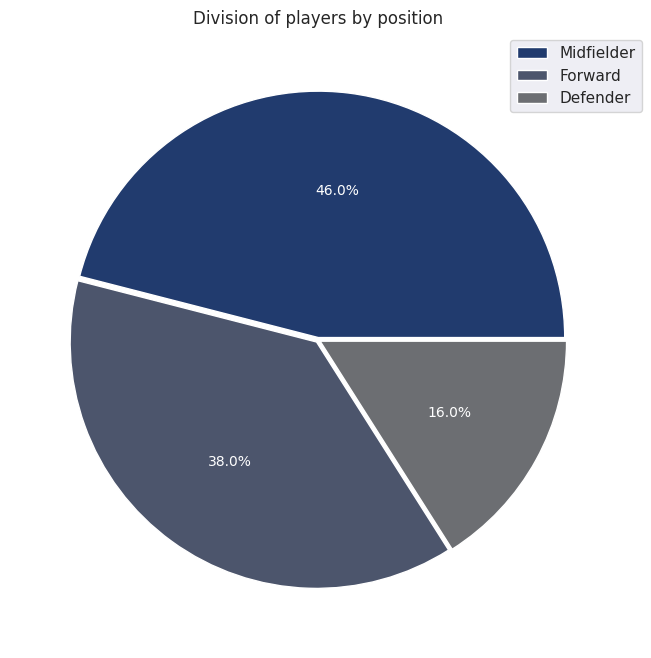

In [ ]:
type_of_position = inner_merge['position'].value_counts()

colors = sns.color_palette('cividis')
p = type_of_position.plot(kind='pie', colors = colors, figsize = (8,8), 
                          legend = 'reverse',title = 'Division of players by position', 
                          fontsize = '10.0', ylabel= '', shadow=False, 
                          explode=[0.01, 0.01, 0.01], autopct = '%1.1f%%', textprops={'color':"w"})
p.legend(bbox_to_anchor = (0.8, 1), loc = 'upper left')

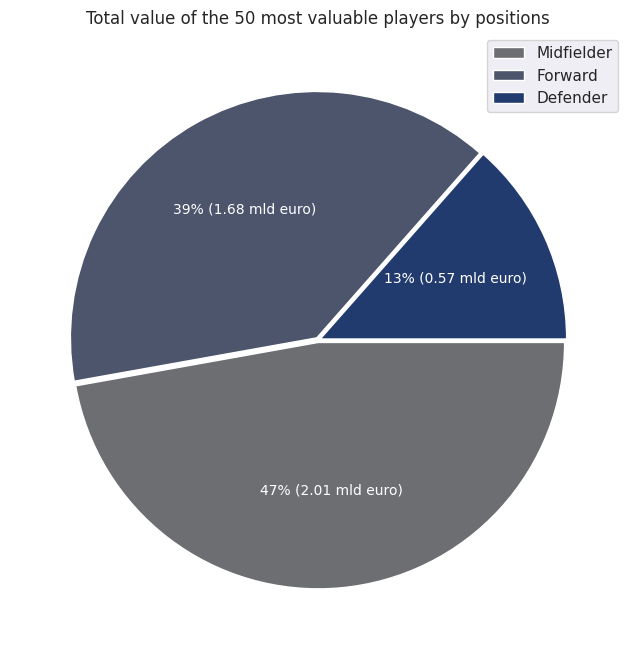

In [ ]:
#Combined value of players given their positions
Combined_value = inner_merge.groupby('position')['Value 2023'].sum()
colors = sns.color_palette('cividis')
c = Combined_value.plot(kind = 'pie', colors = colors, figsize = (8,8), 
                        legend = 'reverse', title = 'Total value of the 50 most valuable players by positions', 
                        fontsize = '10.0', ylabel = '', explode = [0.01, 0.01, 0.01], 
                        autopct = lambda p: '{:.0f}% ({:.2f} mld euro)'.format(p,(p/100000)*Combined_value.sum()), textprops={'color':"w"})


###Analysis 3 - Division players by country

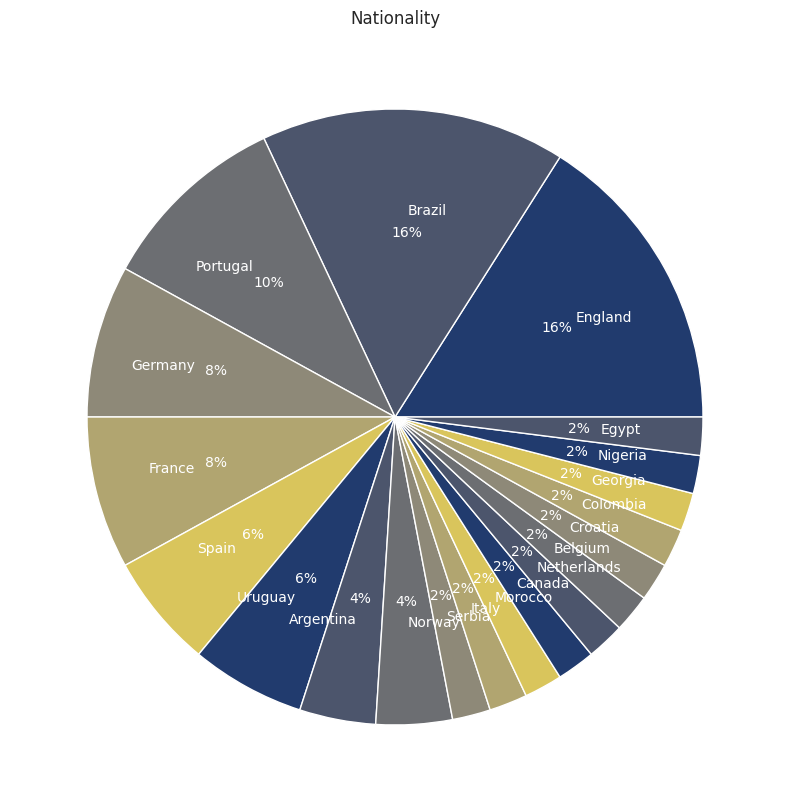

In [ ]:
nationality = inner_merge['nationality'].value_counts()

colors = sns.color_palette('cividis')
p = nationality.plot(kind='pie', colors = colors, figsize = (10,10), legend = None, title = 'Nationality', 
                     labeldistance = 0.67, fontsize = '10.0', ylabel= '', shadow=False, autopct = '%1.0f%%', textprops={'color':"w"})


To show on the map the countries from which the players come, I have installed pigal_maps_world & cairosvg.

In [ ]:
pip install pygal_maps_world

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for pygal_maps_world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278550 sha256=6c8f53bd0ac0af4c90c29985ed076463005e05520c9baead8224758c4dffeaf4
  Stored in directory: /root/.cache/pip/wheels/d7/c6/6a/0b0546db76e2a8ddf6f4426ba7172755470e7139467676b9ef
Successfully built pygal_maps_world


In [ ]:
pip install cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.whl size=90523 sha256=5aef4b6d6533b8d6cc87051a2ee894ddf9565852ec80f51685584dbcedb8a0b5
  Stored in directory: /root/.cache/pip/wheels/3d/f0/15/e20ff54ef59ec58a08e230bd3874e6f412b09e6a3093f856a7
Successfully built cairocffi


In [ ]:
#Uploading nationality codes 
codes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codes.csv', header = 0, delimiter=';' )

In [ ]:
#Joining result(all 5 leagues) with codes based on nationality 
codes_inner_merge = pd.merge(codes, inner_merge, how = 'inner', on = ['nationality'])

In [ ]:
#Replacing United Kingdom with England  
codes['nationality'] = codes['nationality'].replace(['United Kingdom'], 'England')
pd.set_option('display.max_rows', None)

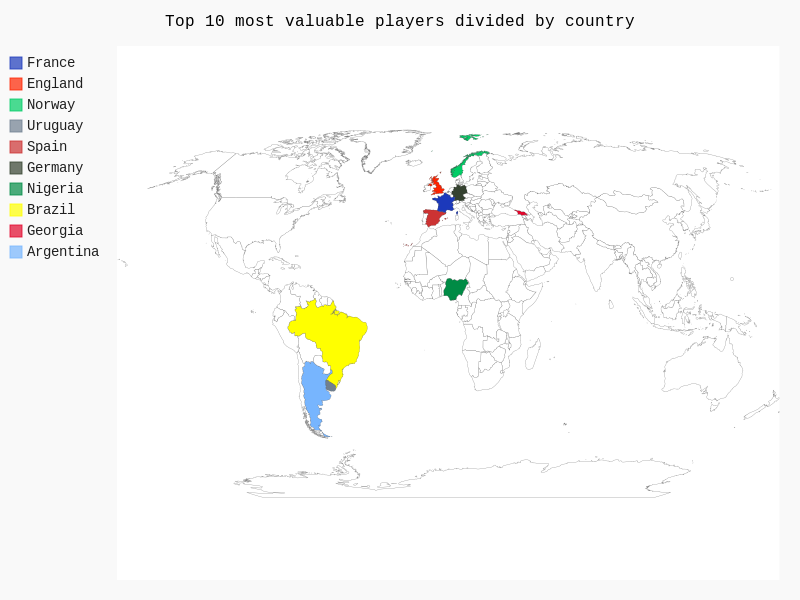

In [ ]:
from pygal_maps_world.maps import World
from pygal.style import Style
worldmap = World()
custom_style = Style(colors = ('#1c39bb','#ff2400', '#00cd66','#708090', '#cc3333','#354230', '#008b45','#ffff00', '#e2062c','#77b5fe'))
worldmap = World(style = custom_style)


worldmap.title = 'Top 10 most valuable players divided by country'
worldmap.add('France', ['fr'])
worldmap.add('England', ['gb'])
worldmap.add('Norway', ['no'])
worldmap.add('Uruguay', ['uy'])
worldmap.add('Spain', ['es'])
worldmap.add('Germany', ['de'])
worldmap.add('Nigeria', ['ng'])
worldmap.add('Brazil', ['br'])
worldmap.add('Georgia', ['ge'])
worldmap.add('Argentina', ['ar'])
worldmap

###Analysis 4 - Division of players by age

In [ ]:
#Changing format of birthdate to 'YY-MM-DD' 
inner_merge['birthday_GMT'] = pd.to_datetime(inner_merge.birthday_GMT, format='%Y-%m-%d')
#Extracting Year from birthday
inner_merge['Date'] = inner_merge['birthday_GMT'].dt.strftime('%Y')
value_age = inner_merge[['Value 2023', 'age', 'position']]

I use the seaborn library for the graphical representation

In [ ]:
import seaborn as sns; sns.set_theme()

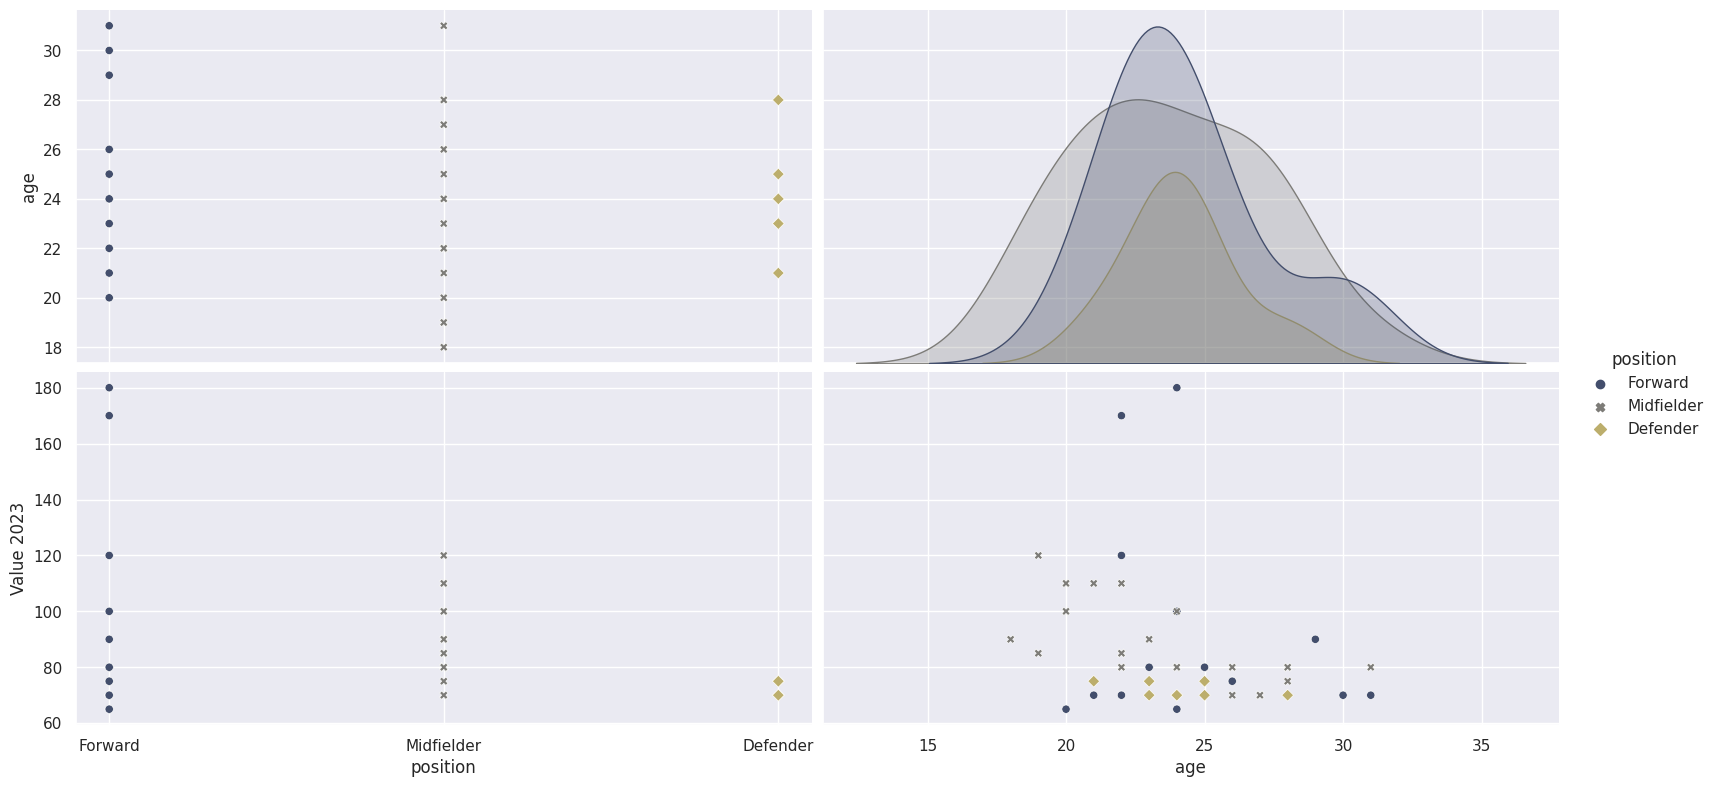

In [ ]:
#Showing age dependency on pair plot 
a = sns.pairplot(value_age, hue = 'position', x_vars = ['position', 'age'], 
             y_vars = ['age', 'Value 2023'], markers=["o", "X", "D"], 
             height = 4, palette = 'cividis', aspect = 2)

###Analysis 5 -  Division of players by goals

In [ ]:
#Showing players with the most goals scored divided by league for season 2022/2023
goalsEng = england.sort_values(by = 'goals_overall', ascending = False)
goals_Eng = goalsEng[:5]

goalsSpa = spain.sort_values(by = 'goals_overall', ascending = False)
goals_Spa = goalsSpa[:5]

goalsIta = italy.sort_values(by = 'goals_overall', ascending = False)
goals_Ita = goalsIta[:5]

goalsGer = germany.sort_values(by = 'goals_overall', ascending = False)
goals_Ger = goalsGer[:5]

goalsFra = france.sort_values(by = 'goals_overall', ascending = False)
goals_Fra = goalsFra[:5]

goalsOve = result.sort_values(by = 'goals_overall', ascending = False)
goals_Ove = goalsOve[:6]

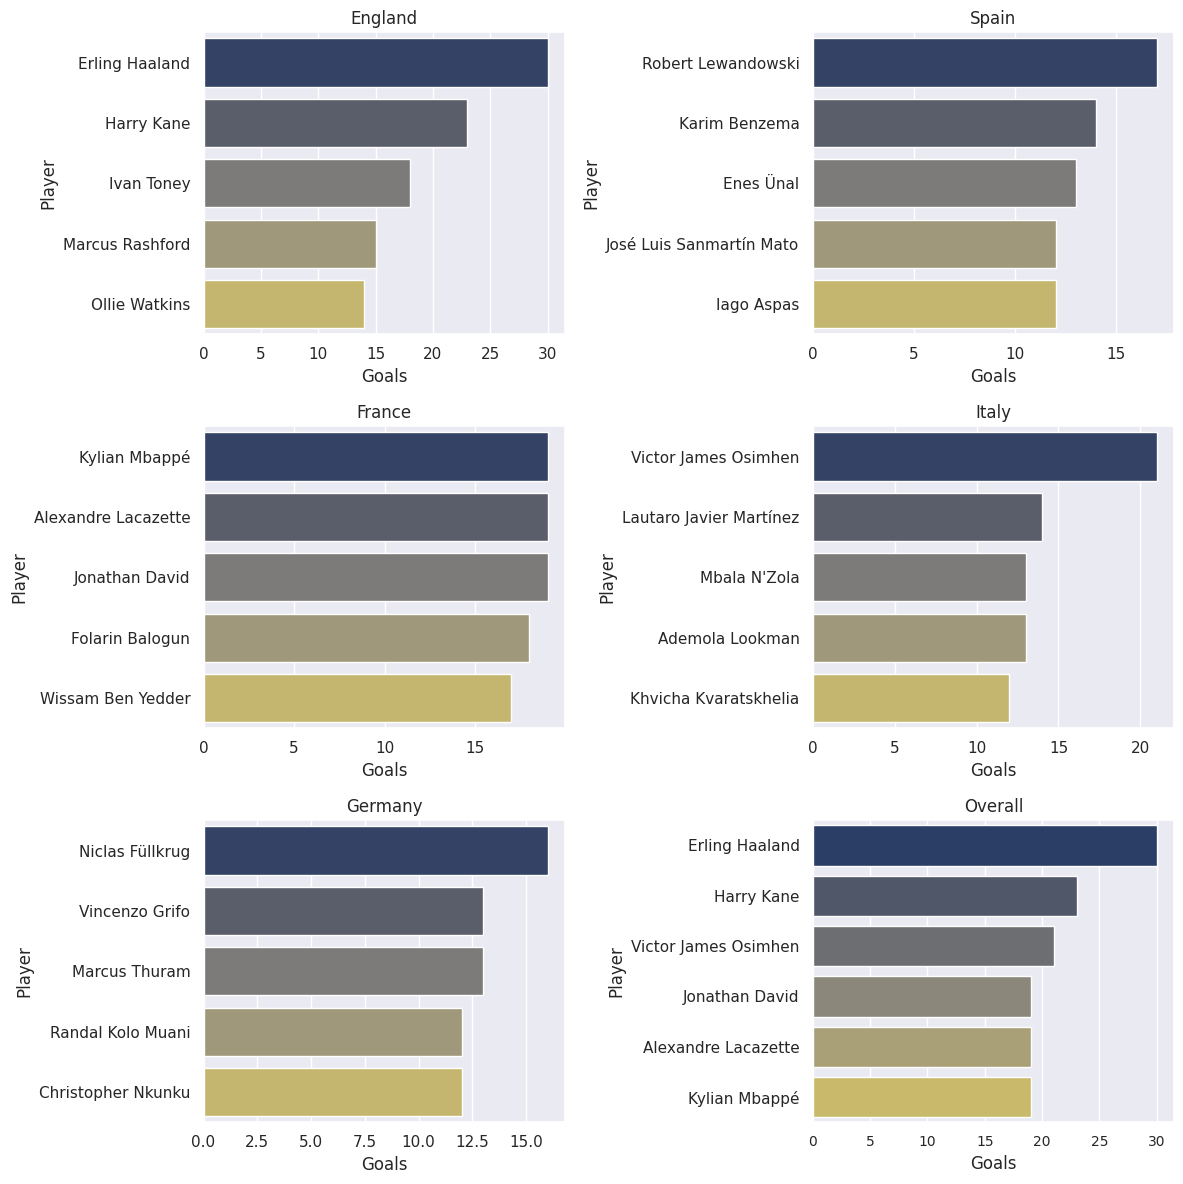

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (12,12), sharey = False)

Eng = sns.barplot(ax = axes[0,0], data = goals_Eng, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'vertical')
Eng.set_xlabel('Goals')
Eng.set_ylabel('Player')
Eng.set_title('England')

Spa = sns.barplot(ax = axes[0,1], data = goals_Spa, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'vertical')
Spa.set_xlabel('Goals')
Spa.set_ylabel('Player')
Spa.set_title('Spain')

Fra = sns.barplot(ax = axes[1,0], data = goals_Fra, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'vertical')
Fra.set_xlabel('Goals')
Fra.set_ylabel('Player')
Fra.set_title('France')

Ita = sns.barplot(ax = axes[1,1], data = goals_Ita, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'vertical')
Ita.set_xlabel('Goals')
Ita.set_ylabel('Player')
Ita.set_title('Italy')

Ger = sns.barplot(ax = axes[2,0], data = goals_Ger, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'vertical')
Ger.set_xlabel('Goals')
Ger.set_ylabel('Player')
Ger.set_title('Germany')

Ove = sns.barplot(ax = axes[2,1], data = goals_Ove, x = 'goals_overall', y = 'full_name', palette = 'cividis')
plt.xticks(fontsize = 10, rotation = 'horizontal')
Ove.set_xlabel('Goals')
Ove.set_ylabel('Player')
Ove.set_title('Overall')

fig.tight_layout()

The most important football variables divided by all players and the top 50 most valuable players for the 2021/2022 and 2022/2023 season.

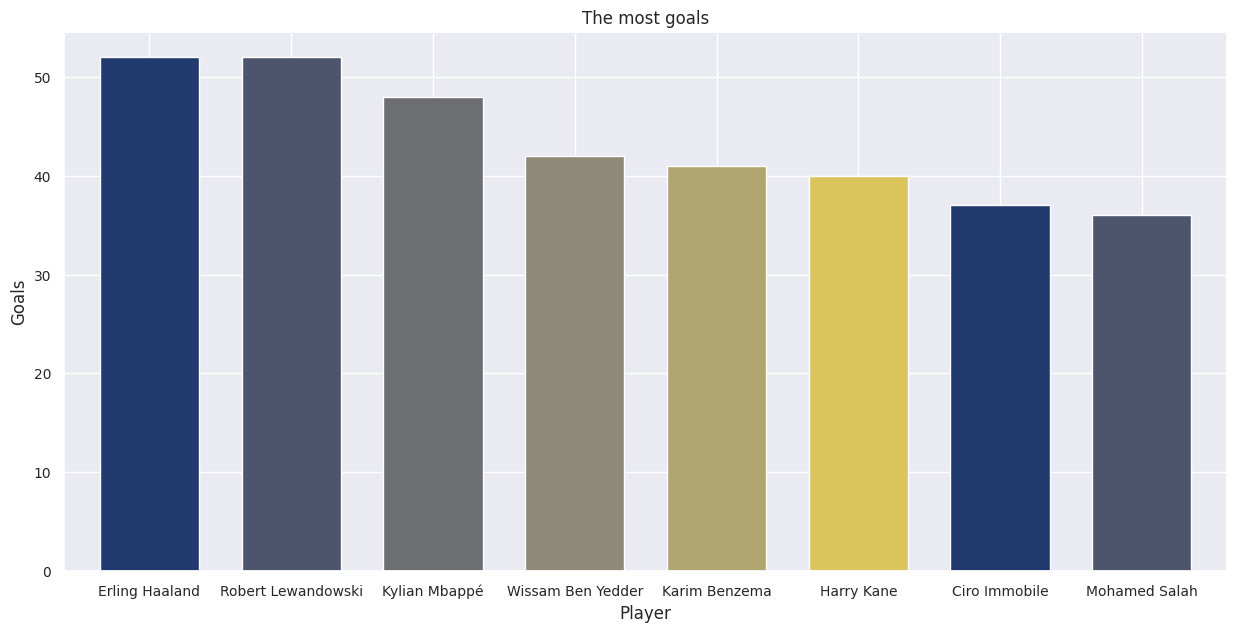

In [ ]:
goalsSco = result21_22.sort_values(by = 'goals_overall', ascending = False)

goal = goalsSco.groupby('full_name')['goals_overall'].sum()
goalScore = goal.nlargest(8)
sns.set(rc={'figure.figsize':(15,7)})
color1 = sns.color_palette('cividis')
g = goalScore.plot(kind = 'bar', legend = False,
                        title = 'The most goals', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

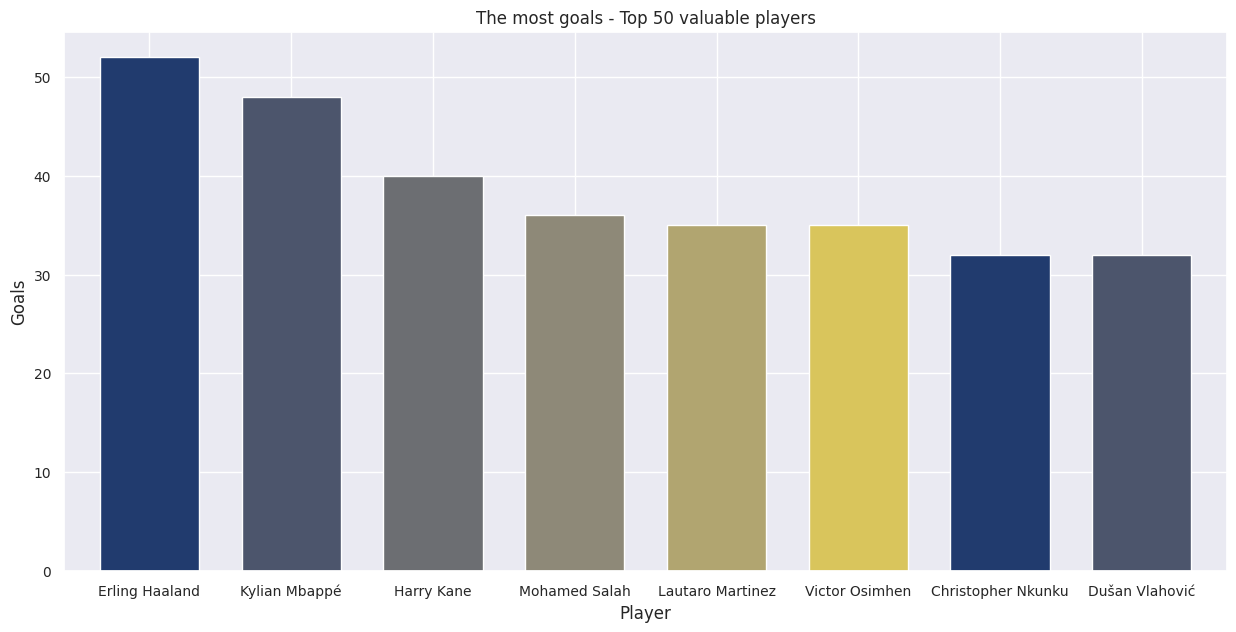

In [ ]:
goalsSco = inner_merge2.sort_values(by = 'goals_overall', ascending = False)

goal = goalsSco.groupby('full_name')['goals_overall'].sum()
goalScore = goal.nlargest(8)
sns.set(rc={'figure.figsize':(15,7)})
color1 = sns.color_palette('cividis')
g = goalScore.plot(kind = 'bar', legend = False,
                        title = 'The most goals - Top 50 valuable players', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

###Analysis 6 - The most assists

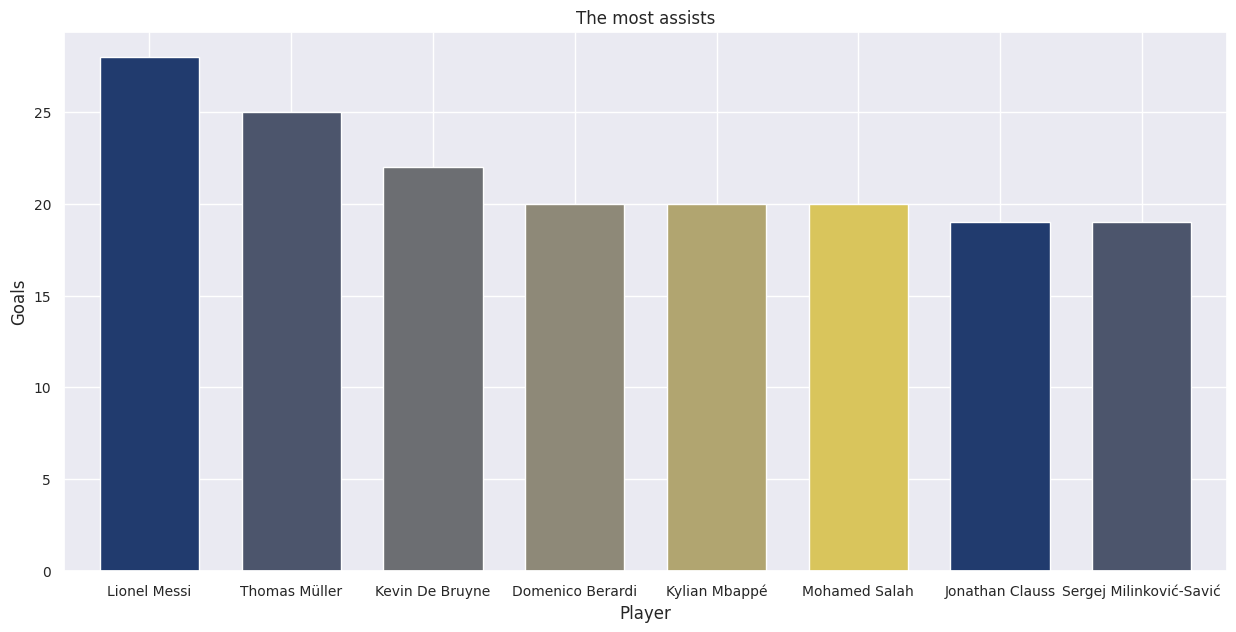

In [ ]:
assist1 = result21_22.sort_values(by = 'assists_overall', ascending = False)
assist1['full_name'] = assist1['full_name'].replace(['Rodrygo Silva de Goes'], 'Rodrygo')
ass = assist1.groupby('full_name')['assists_overall'].sum()
ass1 = ass.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
a = ass1.plot(kind = 'bar', legend = False,
                        title = 'The most assists', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

[(0.0, 25.0)]

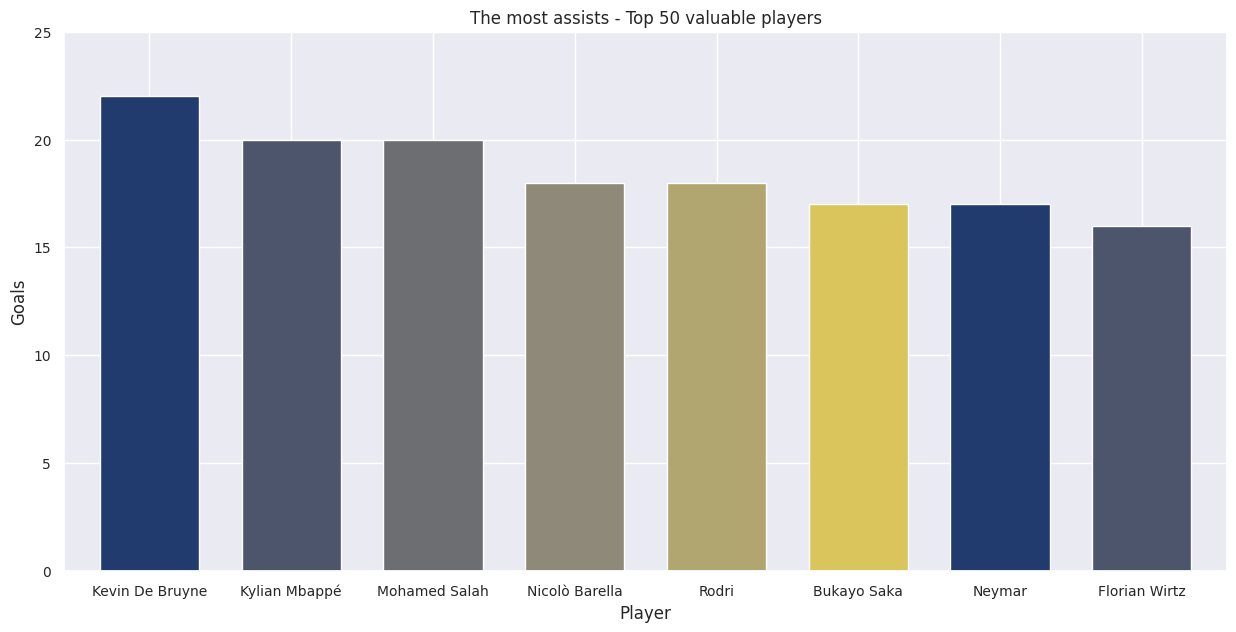

In [ ]:
assist1 = inner_merge2.sort_values(by = 'assists_overall', ascending = False)
assist1['full_name'] = assist1['full_name'].replace(['Rodrygo Silva de Goes'], 'Rodrygo')
ass = assist1.groupby('full_name')['assists_overall'].sum()
ass1 = ass.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
a = ass1.plot(kind = 'bar', legend = False,
                        title = 'The most assists - Top 50 valuable players', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)
a.set(ylim = (0,25))

###Analysis 7 - Key passes

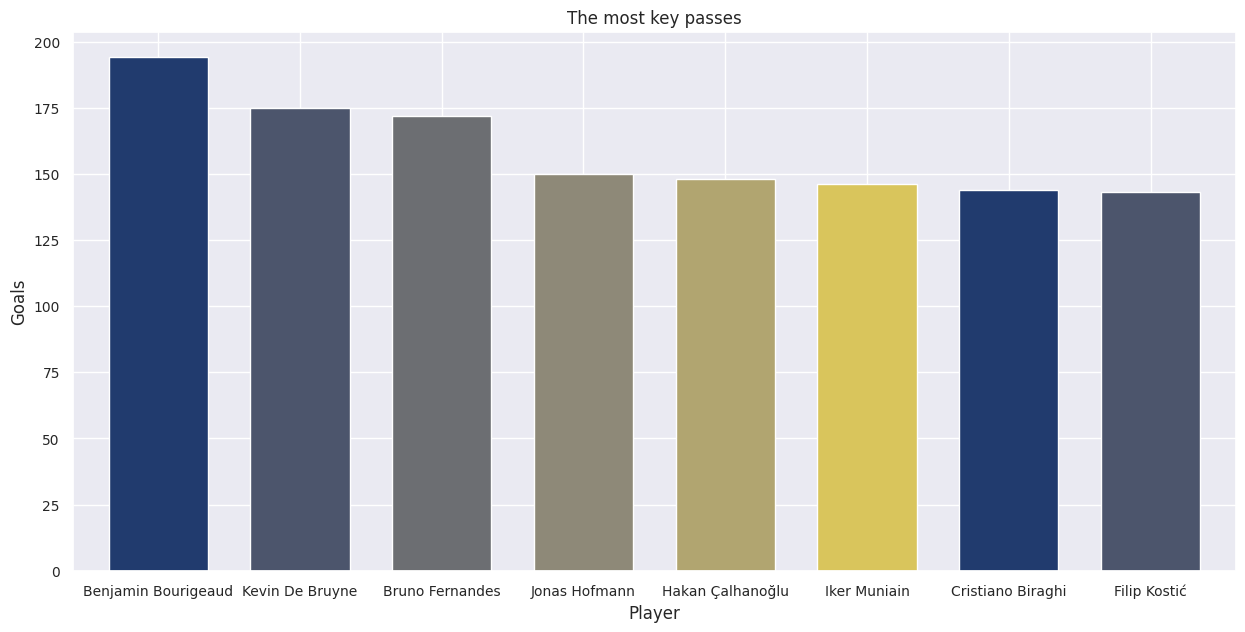

In [ ]:
keypasses = result21_22.sort_values(by = 'key_passes_total_overall', ascending = False)
keypasses['full_name'] = keypasses['full_name'].replace(['Bruno Miguel Borges Fernandes'], 'Bruno Fernandes')
passes = keypasses.groupby('full_name')['key_passes_total_overall'].sum()
passes = passes.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
a = passes.plot(kind = 'bar', legend = False,
                        title = 'The most key passes', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

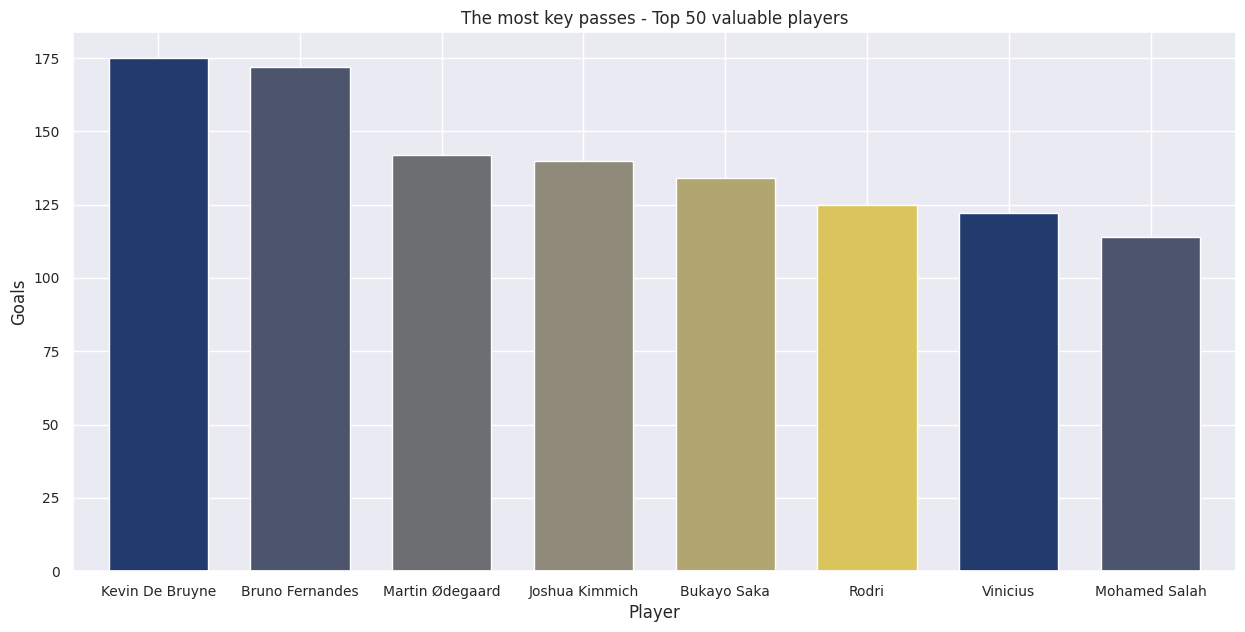

In [ ]:
keypasses = inner_merge2.sort_values(by = 'key_passes_total_overall', ascending = False)
passes = keypasses.groupby('full_name')['key_passes_total_overall'].sum()
keypasses['full_name'] = keypasses['full_name'].replace(['Bruno Miguel Borges Fernandes'], 'Bruno Fernandes')
passes = passes.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
a = passes.plot(kind = 'bar', legend = False,
                        title = 'The most key passes - Top 50 valuable players', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

###Analysis 8 - The most successful dribbles

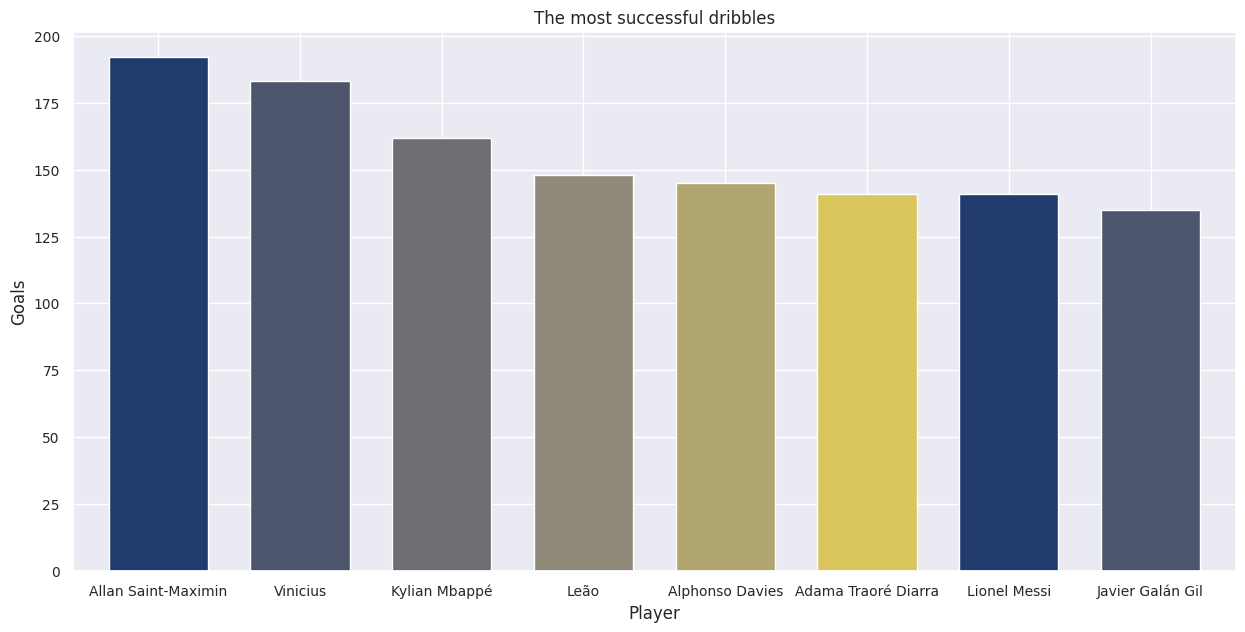

In [ ]:
dribbles = result21_22.sort_values(by = 'dribbles_successful_total_overall', ascending = False)
dribbles['full_name'] = dribbles['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
dribbles['full_name'] = dribbles['full_name'].replace(['Rafael Alexandre Conceição Leão'], 'Leão')
dribbles['full_name'] = dribbles['full_name'].replace(['Bruno Miguel Borges Fernandes'], 'Bruno Fernandes')
dribbles = dribbles.groupby('full_name')['dribbles_successful_total_overall'].sum()
drib = dribbles.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
d = drib.plot(kind = 'bar', legend = False,
                        title = 'The most successful dribbles', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

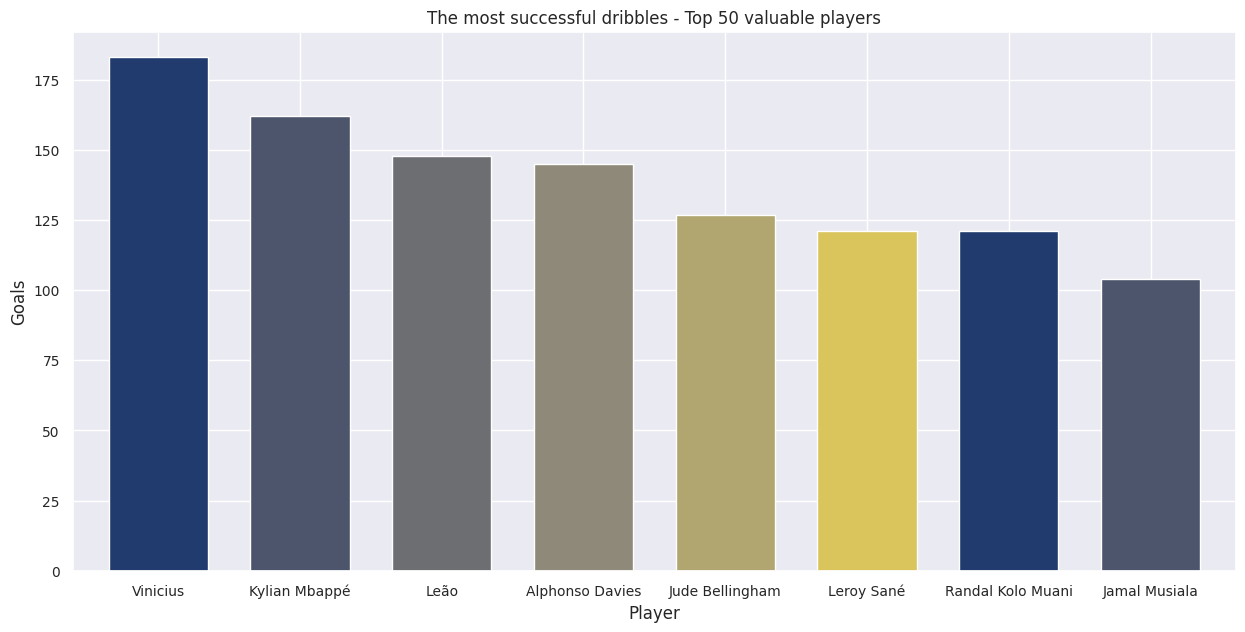

In [ ]:
dribbles = inner_merge2.sort_values(by = 'dribbles_successful_total_overall', ascending = False)
dribbles['full_name'] = dribbles['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
dribbles['full_name'] = dribbles['full_name'].replace(['Rafael Alexandre Conceição Leão'], 'Leão')
drib = dribbles.groupby('full_name')['dribbles_successful_total_overall'].sum()
drib = drib.nlargest(8)

sns.set(rc = {'figure.figsize': (15,7)})
color1 = sns.color_palette('cividis')
d = drib.plot(kind = 'bar', legend = False,
                        title = 'The most successful dribbles - Top 50 valuable players', 
                        fontsize = '10.0', ylabel = 'Goals', xlabel = 'Player', color = color1, rot = 0, width = 0.7)

###Analysis 9 - Players with the most goal involvement

Text(0.5, 1.0, 'The most goal involvement')

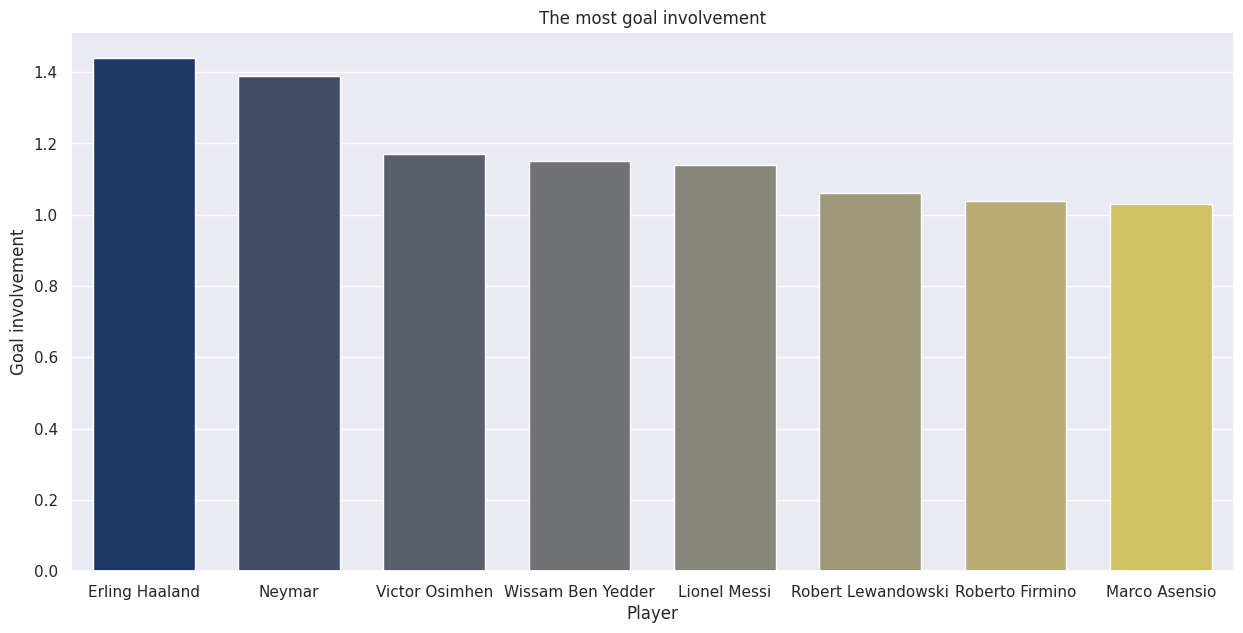

In [ ]:
goalInvolvement = result.sort_values(by = 'goals_involved_per_90_overall', ascending = False)
more_than_500min = goalInvolvement.loc[goalInvolvement['minutes_played_overall'] > 500]
only8 = more_than_500min[['full_name', 'goals_involved_per_90_overall']][:8]

only8['full_name'] = only8['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
only8['full_name'] = only8['full_name'].replace(['Victor James Osimhen'], 'Victor Osimhen')

g = sns.barplot(data = only8, x = 'full_name', y = 'goals_involved_per_90_overall', palette='cividis', width = 0.7 )
g.set(xlabel='Player', ylabel='Goal involvement')
g.set_title('The most goal involvement')

Text(0.5, 1.0, 'The most goal involvement - Top 50 valuable players')

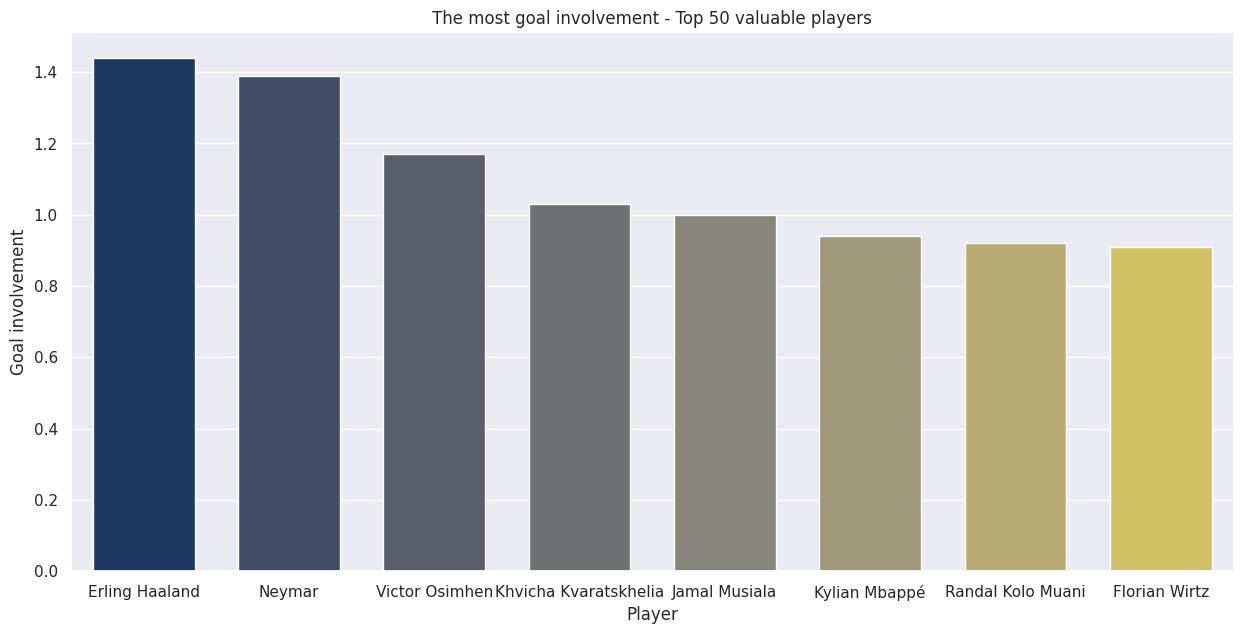

In [ ]:
goalInvolvement = inner_merge.sort_values(by = 'goals_involved_per_90_overall', ascending = False)
more_than_500min = goalInvolvement.loc[goalInvolvement['minutes_played_overall'] > 500]
only8 = more_than_500min[['full_name', 'goals_involved_per_90_overall']][:8]

only8['full_name'] = only8['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')
only8['full_name'] = only8['full_name'].replace(['Victor James Osimhen'], 'Victor Osimhen')

g = sns.barplot(data = only8, x = 'full_name', y = 'goals_involved_per_90_overall', palette='cividis', width = 0.7 )
g.set(xlabel='Player', ylabel='Goal involvement')
g.set_title('The most goal involvement - Top 50 valuable players')

###Analysis 10 - Baloon d'or winners with market value

I use Ballon d'or award ranking data for 2022 from website www.transfermarket.com.

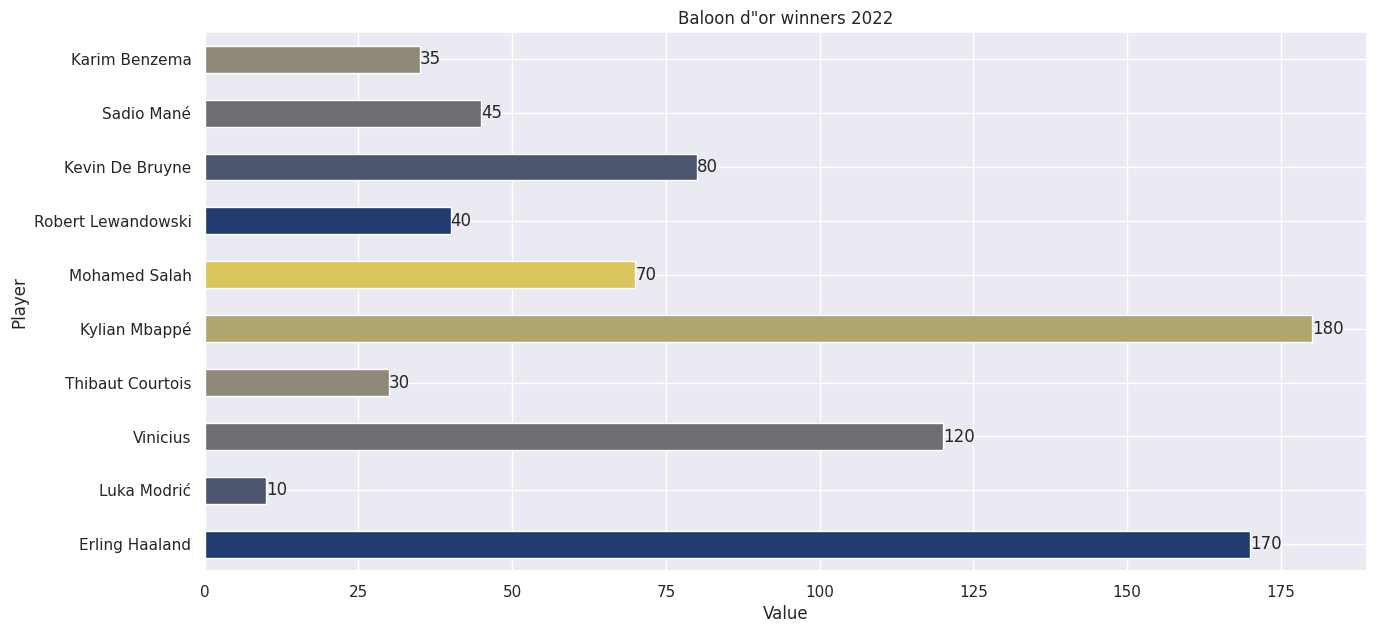

In [ ]:
balon1 = balon.sort_values(by = 'Place', ascending = False)
balon1['full_name'] = balon1['full_name'].replace(['Vinícius José Paixão de Oliveira Júnior'], 'Vinicius')

sns.set(rc = {'figure.figsize': (15,7)})
color = sns.color_palette('cividis')
ax = balon1.plot(kind = 'barh', x = 'full_name', y = 'Value ', color = color, 
                 title = 'Baloon d"or winners 2022',  
                 xlabel = 'Value', ylabel = 'Player', legend = False)
    
for i in ax.containers:
    ax.bar_label(i)

###Analysis 11 - Comparison of player values between the June 2022 and the June 2023.

<Axes: title={'center': 'Player values June 2022 vs. June 2023'}, xlabel='Player', ylabel='Value'>

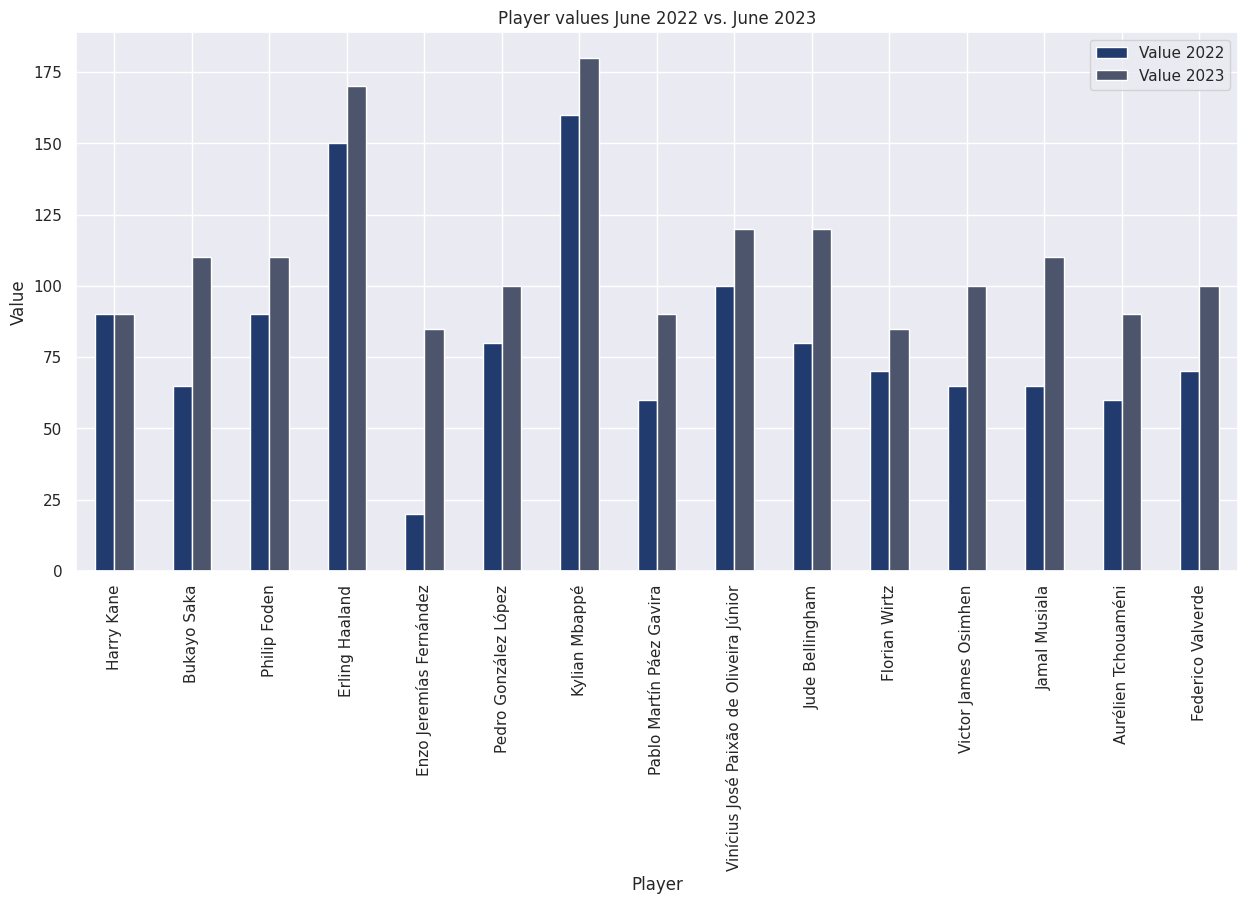

In [ ]:
value_only15 = values[values.notnull().all(1)]

colour = sns.color_palette('cividis')
value_only15.plot(x = 'full_name', y = ['Value 2022', 'Value 2023'],xlabel = 'Player', ylabel = 'Value',  kind = 'bar', color = colour, 
                  title = 'Player values June 2022 vs. June 2023')

##**Model of linear regression**
To calculate which value influences the value of a football player the most, I use linear regression analysis. Regression analysis helps to understand how different variables (such as goals, assists, age, key passes and dribbles) correlate with the market value of players.

Graphical presentation of players market values and variables

Text(0.5, 1.06, 'Market value vs variables')

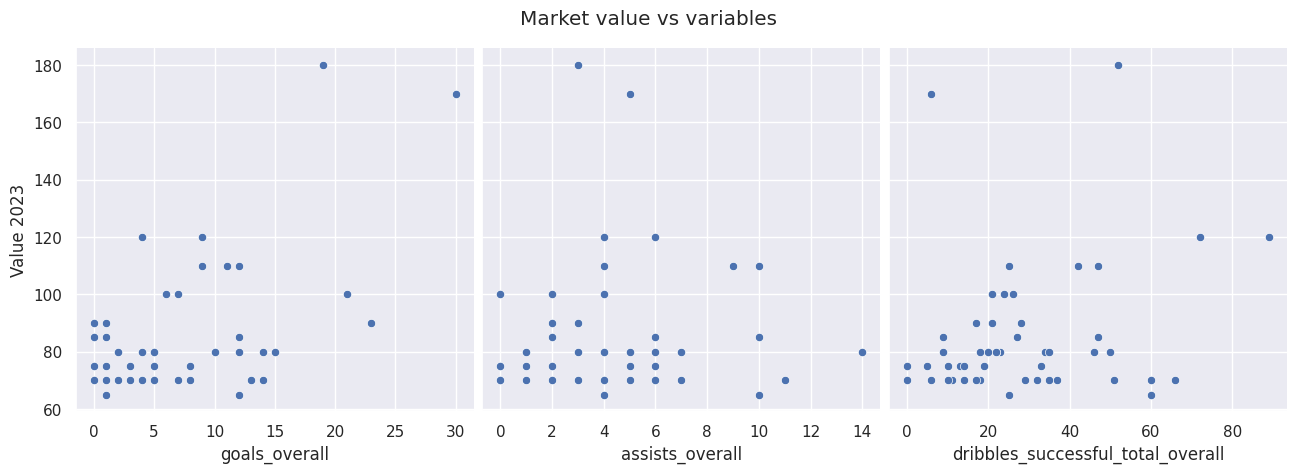

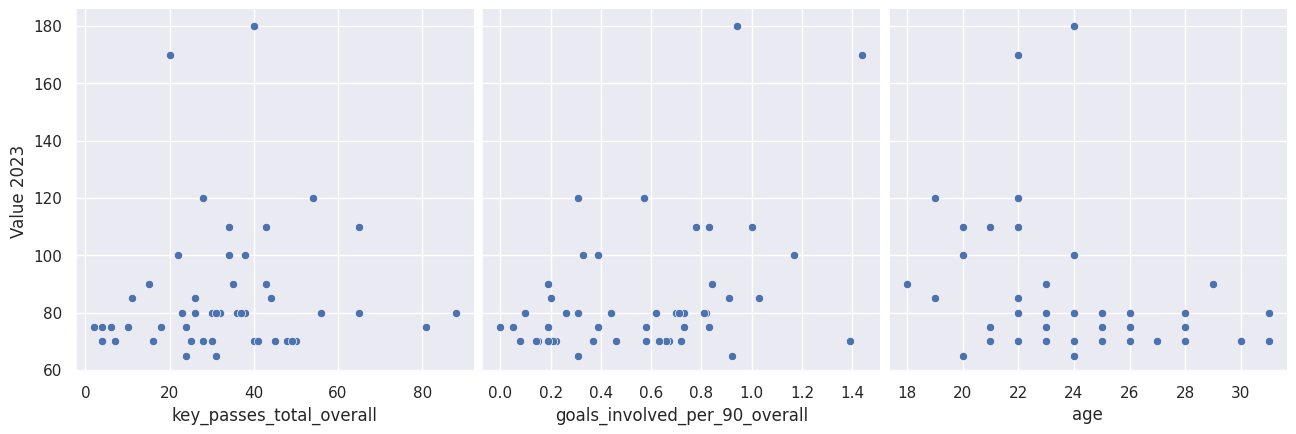

In [ ]:
df = inner_merge[["full_name", "Value 2023", "assists_overall", "position", 
                   'goals_overall','dribbles_successful_total_overall', 'key_passes_total_overall', 'goals_involved_per_90_overall', 'age' ]]
df1 = df.groupby(['full_name', 'Value 2023', 'age'], as_index = False)[['goals_overall', 'assists_overall', 'key_passes_total_overall', 
                                                             'dribbles_successful_total_overall', 'goals_involved_per_90_overall']].sum()

g = sns.pairplot(df1, x_vars =['goals_overall', "assists_overall", 'dribbles_successful_total_overall'],
             y_vars = 'Value 2023', height = 4.4, aspect = 1, kind = 'scatter')
g1 = sns.pairplot(df1, x_vars =['key_passes_total_overall', 'goals_involved_per_90_overall', 'age'],
             y_vars = 'Value 2023', height = 4.4, aspect = 1, kind = 'scatter')
g.fig.suptitle("Market value vs variables", y = '1.06')

###**Regression analysis**

I use the scikit-learn library to build a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

X = df1[['goals_overall', 'assists_overall','goals_involved_per_90_overall', 'dribbles_successful_total_overall', 'key_passes_total_overall', 'age']]
y = df1['Value 2023']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print('Regression coefficient ')
print('Goals:', model.coef_[0])
print('Assists:', model.coef_[1])
print('Goal involvement:', model.coef_[2])
print('Dribbles:', model.coef_[3])
print('Key Passes:', model.coef_[4])
print('Age:', model.coef_[5])

Regression coefficient 
Goals: 1.9870741922334134
Assists: -1.1546499165127353
Goal involvement: 2.0313428614531577
Dribbles: 0.043748700953562314
Key Passes: 0.1847000005863314
Age: -2.833330253116911


###**Evaluating the model**

R_squared - coefficient of the determination. It shows how many values fall on regression line. The value 44.35 indicates that 44.35% of the data fit the regression model.

In [ ]:
from sklearn.metrics import accuracy_score
print('R_squared: {:.2f}'.format(model.score(X,y)*100))

R_squared: 44.35


#**Conclussion**

The result of the analysis is the following:

**position:**

---


The position with the highest market value is striker(Kylian Mbappe - 180 mln euro), while numerically the top 50 players with the highest market value are most midfielders. 

**nationality:**

---


The top 50 most valuable players are mostly from Europe and South America, with English (16%) and Brazilian (16%) players dominating the field respectively.

**league:**

---


The top 50 are dominated by players from the English league - Premier League (42%). The second most numerous group is made up of players from the German league - Bundesliga (20%), even though it is generally less appreciated than the Spanish and Italian leagues.

**age:**

---


Most valuable players are in the 22-25 range, rarely over 30.

**goals:**

---


The number of goals scored is the most important sport criterion for determining the value of a player. However, this variable does not determine the highest value if it is not combined with other factors, as the most goal-scoring players are not the most valuable. Example Erling Haaland (22 years old, 52 goals in two seasons) and Robert Lewandowski (34 years old, 52 goals in two seasons). With Haaland being the second most valuable player and Robert Lewandowski not appearing in the top 50 most valuable players at all.

**assists, key passes, dribbles:**

---


Play a marginal role in assessing a player's value. Top assist man Lionel Messi is 104th in the ranking of most valuable footballers, while top dribbler Alan Saint-Maximin is only 154th.

**sports value:**

---


Considering the ranking of the Baloon D'or award - places 1,2,4 were occupied by players outside the 50 most valuable footballers. The most expensive player Kylian Mbappe, only came 6th.

**representative success:**

---


Very important in the context of Enzo Fernandez. Despite fairly mediocre club statistics, he won the World Cup with Argentina at a young age by being one of the key figures at the tournament. This resulted in an increase in value from €20 million the previous year to over €80 million today.

**regression analysis:**

---


The results showed that, taking all factors into account, age is the most significant indicator. The linear regression analysis presents that for every year less the value of a player increases by 2.83 million. The second most significant factor is goals, which indicates an increase in value of 1.98 million for every goal scored more.

